<a href="https://colab.research.google.com/github/SushilKokare/AtiNeu_Project/blob/main/7_DenseNet121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet121
from keras.layers import Dense,Flatten
from keras.models import Model

In [22]:
input_shape = (224,224)
batch_size=32

In [23]:
train_dir = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Train'
test_dir = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Test'

In [24]:
train_datagen = ImageDataGenerator (rescale = 1./225,)
test_datagen = ImageDataGenerator (rescale = 1./225)

In [25]:
train_gen  = train_datagen.flow_from_directory(
    train_dir,
    target_size = input_shape,
    class_mode = 'binary',
    batch_size = batch_size,
    classes=['Normal','Stroke']
)

Found 2251 images belonging to 2 classes.


In [26]:
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size = input_shape,
    batch_size = batch_size,
    class_mode = 'binary',
    classes=['Normal','Stroke']
)

Found 250 images belonging to 2 classes.


In [32]:
base_model = DenseNet121(weights='imagenet',include_top=False,
                         input_shape=(input_shape[0],input_shape[1],3))

29084464/29084464 [==============================] - 2s 0us/step


In [33]:
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D

In [35]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1,activation='sigmoid')(x)


In [37]:
model = Model(inputs=base_model.input,outputs=x)

In [38]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [54]:
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=test_gen
)

Epoch 1/10
71/71 [==============================] - 27s 376ms/step - loss: 0.1692 - accuracy: 0.9351 - val_loss: 4.4369 - val_accuracy: 0.6480
Epoch 2/10
71/71 [==============================] - 27s 376ms/step - loss: 0.1133 - accuracy: 0.9614 - val_loss: 2.9020 - val_accuracy: 0.6960
Epoch 3/10
71/71 [==============================] - 27s 374ms/step - loss: 0.1203 - accuracy: 0.9574 - val_loss: 1.5570 - val_accuracy: 0.6560
Epoch 4/10
71/71 [==============================] - 26s 371ms/step - loss: 0.0619 - accuracy: 0.9782 - val_loss: 1.0159 - val_accuracy: 0.7720
Epoch 5/10
71/71 [==============================] - 27s 377ms/step - loss: 0.0649 - accuracy: 0.9787 - val_loss: 0.3839 - val_accuracy: 0.8600
Epoch 6/10
71/71 [==============================] - 27s 372ms/step - loss: 0.0725 - accuracy: 0.9720 - val_loss: 0.5753 - val_accuracy: 0.8800
Epoch 7/10
71/71 [==============================] - 28s 396ms/step - loss: 0.0190 - accuracy: 0.9942 - val_loss: 0.5292 - val_accuracy: 0.8960

In [55]:
loss,acc = model.evaluate(test_gen)

8/8 [==============================] - 1s 135ms/step - loss: 0.9120 - accuracy: 0.7600


In [56]:
print('Acc ',acc)

Acc  0.7599999904632568


In [57]:
import pandas as pd

In [58]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.169159,0.935140,4.436914,0.648
1,0.113274,0.961351,2.901963,0.696
2,0.120316,0.957352,1.556951,0.656
3,0.061928,0.978232,1.015901,0.772
4,0.064943,0.978676,0.383931,0.860
5,0.072505,0.972012,0.575336,0.880
6,0.019021,0.994225,0.529233,0.896
7,0.115931,0.961351,1.964658,0.704
8,0.030828,0.988894,0.144009,0.948
9,0.024402,0.991115,0.912011,0.760


In [59]:
import matplotlib.pyplot as plt

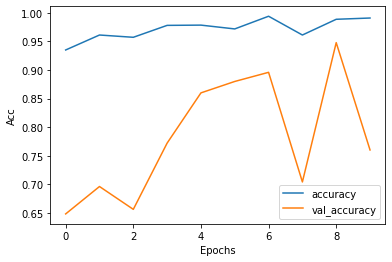

In [60]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Acc')
for i in ['accuracy','val_accuracy']:
  x = history.history[i]
  plt.plot(x,label=i)
plt.legend()